<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BrianBarajas/blob/main/Proyecto_Final_ResNet50_BrianBarajas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brian Gabriel Barajas Guerrero
# Proyecto Final - Machine Learning 2023
## Red Neuronal con uso de ResNet 50 para el analisis de imagenes

# Introducción
En los últimos años, el deep learning ha emergido como un poderoso paradigma en el campo de la inteligencia artificial, demostrando notables capacidades en tareas que van desde la clasificación de imágenes al procesamiento del lenguaje natural. Uno de los avances clave en arquitecturas de aprendizaje profundo es el desarrollo de redes neuronales convolucionales (CNN), que han revolucionado las aplicaciones de visión por ordenador. Este proyecto profundiza en la aplicación de una arquitectura CNN específica, ResNet50, para la clasificación de imágenes utilizando el conjunto de datos CIFAR-10.

ResNet50, abreviatura de Residual Network con 50 capas, representa un hito en la evolución de las CNN. Aborda los retos del entrenamiento de redes neuronales profundas introduciendo bloques de aprendizaje residual. Estos bloques permiten a la red aprender funciones residuales, mitigando problemas como el del gradiente evanescente y facilitando el entrenamiento de modelos extremadamente profundos. Diseñada originalmente para tareas de reconocimiento de imágenes a gran escala como ImageNet, ResNet50 ha demostrado su eficacia en diversas aplicaciones de visión por ordenador.

ResNet-50 es una arquitectura de red neuronal convolucional (CNN) que fue propuesta por Microsoft Research y ha demostrado ser eficaz en tareas de clasificación de imágenes y otras aplicaciones de visión por computadora.
- La característica distintiva de ResNet es el uso de bloques residuales. Estos bloques permiten que la información de la capa de entrada pase directamente a través de la red sin cambios, lo que ayuda a mitigar el problema de desvanecimiento del gradiente y facilita el entrenamiento de redes más profundas.
- ResNet-50 es una red profunda con 50 capas, de ahí su nombre. La arquitectura incluye capas convolucionales, capas de agrupación (pooling), y bloques residuales.
- Emplea principalmente filtros convolucionales de tamaño 3x3 en las capas convolucionales.
- Usa capas de agrupación para reducir las dimensiones espaciales de las características y extraer características relevantes a diferentes escalas.


El objetivo principal de este proyecto es implementar y evaluar la arquitectura ResNet50 para la clasificación de imágenes en el conjunto de datos CIFAR-10. CIFAR-10 es un conocido conjunto de datos de referencia que contiene 60.000 imágenes en color de 32x32 de diez clases diferentes. Este conjunto de datos constituye un punto de partida ideal para experimentar con arquitecturas de redes neuronales debido a su tamaño manejable y a la diversidad de su contenido visual.

El proyecto utiliza el marco de deep learning TensorFlow, aprovechando el modelo ResNet50 preentrenado en el conjunto de datos ImageNet. Este modelo preentrenado se emplea como base, y se añaden capas adicionales para adaptarlo a los requisitos específicos del conjunto de datos CIFAR-10. El proceso de entrenamiento consiste en optimizar los parámetros del modelo utilizando el optimizador Adam y la función de pérdida de crossentropy categórica, con la precisión como métrica.

El procedimiento incluye el preprocesamiento de los datos de CIFAR-10, el entrenamiento del modelo, el almacenamiento del modelo entrenado en un archivo, la carga del modelo para su evaluación y la visualización del historial de entrenamiento mediante gráficos de precisión y pérdida a lo largo de las épocas.

En este informe se analiza cada uno de los pasos, ofreciendo información sobre las opciones de implementación, las consideraciones y los resultados. A medida que avanzamos, nos adentramos en las complejidades del código y el pseudocódigo, con el objetivo de proporcionar una comprensión global de la metodología empleada en este proyecto de clasificación de imágenes basado en ResNet50.

# Desarrollo
En la sección de desarrollo, nos adentramos en los detalles de la implementación del proyecto de clasificación de imágenes basado en ResNet50. Esto incluye una explicación de cada elemento de la red y la justificación de la elección de los hiperparámetros.

### Lo primero que haremos será instalar la librería de tensor flow y, seguido de esto, guardaremos el data-set que usaremos para entrenar nuestra red

La arquitectura ResNet50 consta de 50 capas y emplea un marco de aprendizaje residual para superar los retos asociados al entrenamiento de redes neuronales profundas. La innovación clave es la introducción de bloques residuales, en los que las conexiones de salto permiten a la red aprender funciones residuales. Estas conexiones facilitan el flujo de gradientes durante la retropropagación, mitigando el problema del gradiente evanescente y permitiendo el entrenamiento de redes muy profundas.

En nuestra implementación, aprovechamos el modelo ResNet50 preentrenado en el conjunto de datos ImageNet. La elección de un modelo preentrenado tiene dos objetivos principales: aprovechar las características aprendidas de un gran conjunto de datos y ahorrar recursos computacionales.

CIFAR-10 consta de 60.000 imágenes en color de 32x32 en 10 clases diferentes, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba. Este conjunto de datos se utilizan ampliamente para tareas de clasificación de imágenes, y son relativamente más pequeños en comparación con ImageNet, lo que los hace más manejables para la experimentación.

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 390.6 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.5 MB/s eta 0:00:000m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 166.3 kB/s eta 0:00:0031m88.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 KB 1.0 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 419.2 kB/s eta 0:00:0031m43.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 273.0 kB/s eta 0:00:0031m52.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 1.3 MB/s eta 0:00:0031m35.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 7.0 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.5 MB/s eta 0:00:000m eta 0:00:010:01
     ━━━━━━━━━━━━━

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 14s 0us/step


- A continuación exploramos brevemente el data set para tener una idea de qué estamos manejando e imprimimos algunas imagenes para una mejor visualización

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


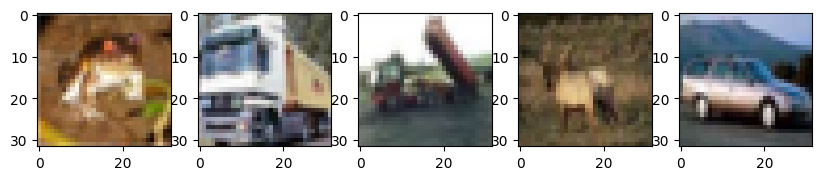

Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test labels: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Print the shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# Visualize some images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
plt.show()

# Check the distribution of classes
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

- Ahora preprocesaremos nuestros datos. Esto lo haremos al normalizar los datos de imagen. Los datos de imagen suelen estar en el intervalo $[0, 255]$. Normalícelos al intervalo $[0, 1]$ dividiéndolos por 255. También codificaremos las etiquetas. Las etiquetas son números enteros que van de 0 a 9. Los convertiremos en vectores.
- Utilizaremos el modelo ResNet50 preentrenado como base, añadiremos la agrupación de promedios globales y ampliaremos la arquitectura con una capa totalmente conectada y una capa final softmax para la clasificación.

In [3]:
from tensorflow.keras.utils import to_categorical

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Tras cargar el modelo ResNet50 preentrenado, ampliamos su arquitectura para adaptarla a la tarea de clasificación de diez clases de CIFAR-10. Se añade una capa de agrupación de promedios globales para reducir las dimensiones espaciales, y una capa densa con activación ReLU ayuda a capturar patrones complejos en la representación aplanada. La capa densa final con activación Softmax produce probabilidades de clase.

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer with 10 classes (for CIFAR-10)
predictions = Dense(10, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (should be done after setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 4s 0us/step


## Elección de hiperparámetros
- Optimizador (Adam): Adam es una opción popular porque combina las ventajas de otras dos extensiones del descenso por gradiente estocástico. En concreto, calcula una media móvil exponencial del gradiente y del gradiente al cuadrado, y los parámetros beta1 y beta2 controlan las tasas de decaimiento de estas medias móviles. El optimizador Adam funciona bien en la práctica y se compara favorablemente con otros algoritmos del método de aprendizaje adaptativo, ya que converge muy rápido y la velocidad de aprendizaje del Modelo es bastante alta.
- Función de Pérdida (Categorical Crossentropy): Esta función de pérdida se utiliza para tareas de clasificación multiclase. Es más adecuada que la entropía cruzada binaria para problemas multiclase, ya que tiene en cuenta la etiqueta de clase. Esto hace que se ajuste bien al conjunto de datos CIFAR-10, que tiene 10 clases diferentes.
- Métrica (Precisión): La precisión es una métrica común para las tareas de clasificación. Es fácil de interpretar, ya que es sólo la proporción de predicciones correctas sobre el total de predicciones.
- Tasa de aprendizaje (por defecto 0,001): La tasa de aprendizaje controla cuánto cambiar el modelo en respuesta al error estimado cada vez que se actualizan los pesos del modelo. Si la tasa de aprendizaje es demasiado baja, el proceso de entrenamiento convergerá lentamente. Si la tasa de aprendizaje es demasiado alta, los pesos pueden sobrepasar los valores óptimos. Una tasa de aprendizaje de 0,001 es razonable por defecto, pero a menudo es una buena idea experimentar con diferentes tasas de aprendizaje.
- Tamaño del batch (Por defecto 32): El tamaño del lote determina cuántos ejemplos se miran antes de hacer una actualización del peso. Cuanto menor sea, más ruidosa será la señal de entrenamiento, cuanto mayor sea, más tiempo se tardará en calcular el gradiente para cada paso. El tamaño de lote de 32 es una elección común y un buen punto de partida.
- Número de Epochs (10): Este es el número de veces que el algoritmo de aprendizaje trabajará a través de todo el conjunto de datos de entrenamiento. Entrenar durante más epochs puede llevar a un mejor rendimiento, pero también puede llevar a un sobreajuste si no se tiene cuidado. El número de epochs puede aumentarse si el rendimiento del modelo en el conjunto de validación sigue mejorando con cada epoch.
- Fijación de capas: Para evitar el sobreajuste y conservar el conocimiento preentrenado, las capas del modelo ResNet50 base se congelan durante el entrenamiento.

Vamos a fijar las capas del modelo preentrenado para evitar que se actualicen durante el entrenamiento, esto es especialmente útil cuando se trabaja con un conjunto de datos más pequeño como CIFAR-10.

In [5]:
for layer in base_model.layers:
    layer.trainable = False
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

El modelo se entrena utilizando la arquitectura compilada, el optimizador, la función de pérdida y las métricas. El entrenamiento implica la retropropagación de errores a través de la red, ajustando pesos y sesgos para minimizar la pérdida.

El historial de entrenamiento, incluidas las pérdidas y la precisión a lo largo de las epochs, se visualiza para su análisis.

El modelo entrenado se evalúa en el conjunto de pruebas, lo que proporciona información sobre su rendimiento de generalización. La precisión de la prueba y las métricas de pérdida son indicadores cruciales de la eficacia del modelo.



Epoch 1/10
1563/1563 [==============================] - 122s 51ms/step - loss: 1.3692 - accuracy: 0.5431 - val_loss: 1.2971 - val_accuracy: 0.5723
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0813 - accuracy: 0.6357 - val_loss: 1.9041 - val_accuracy: 0.3929
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1090 - accuracy: 0.6187 - val_loss: 1.2136 - val_accuracy: 0.6008
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0325 - accuracy: 0.6469 - val_loss: 1.1987 - val_accuracy: 0.5940
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0058 - accuracy: 0.6568 - val_loss: 1.7231 - val_accuracy: 0.4414
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8719 - accuracy: 0.7057 - val_loss: 1.1164 - val_accuracy: 0.6417
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9218 - accuracy: 0.6880 - val_loss: 1.3204 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 11ms/step - loss: 1.3857 - accuracy: 0.5110
Test loss: 1.385701298713684
Test accuracy: 0.5109999775886536


Text(0.5, 1.0, 'Training - Accuracy')

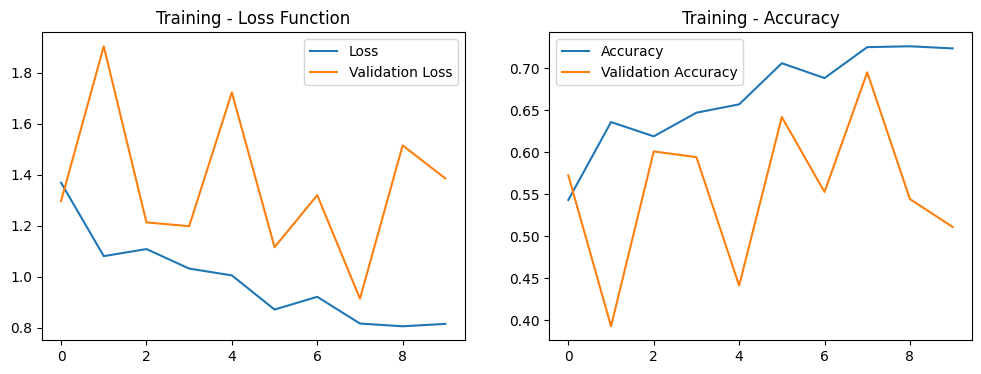

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Save the model
model.save('my_model.h5')

# Load the model
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

In [11]:
# Make predictions on the test set
predictions = model.predict(x_test)

# The predictions are probabilities for each class, take the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

313/313 [==============================] - 4s 8ms/step
[3 8 9 ... 2 4 7]


In [12]:
new_labels = np.argmax(y_test, axis=1)

# Compare predictions to true labels
correct = predicted_classes == new_labels

# Calculate accuracy
accuracy = np.mean(correct)

print('New data accuracy:', accuracy)

New data accuracy: 0.511


El modelo se aplica a los nuevos datos y se generan predicciones. Las predicciones correctas e incorrectas se muestrean aleatoriamente y se presentan visualmente, incluyendo las etiquetas verdaderas y las predichas.

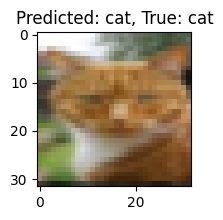

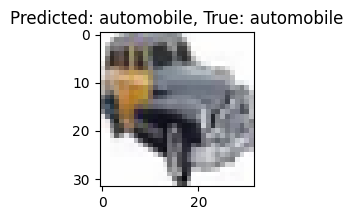

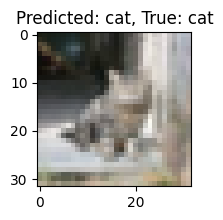

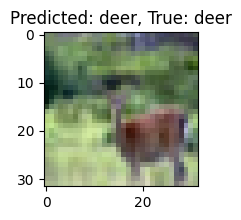

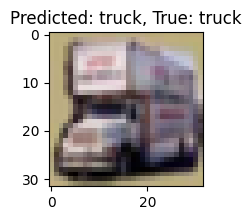

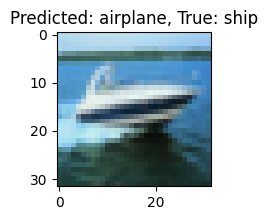

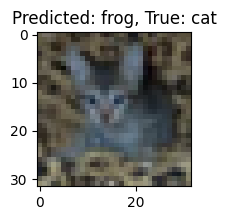

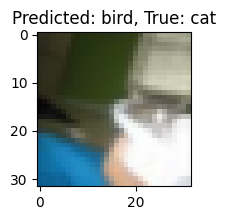

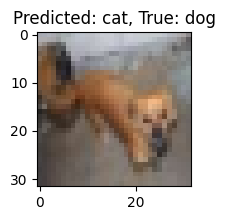

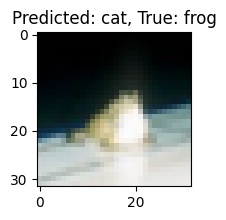

In [14]:
#  Find correct and incorrect predictions
correct_indices = np.nonzero(predicted_classes == new_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != new_labels)[0]

# Choose a few random correct and incorrect predictions
random_correct = np.random.choice(correct_indices, size=5, replace=False)
random_incorrect = np.random.choice(incorrect_indices, size=5, replace=False)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display correct predictions
for i, correct in enumerate(random_correct):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[correct])
    plt.title(f"Predicted: {class_names[predicted_classes[correct]]}, True: {class_names[new_labels[correct]]}")
    plt.show()

# Display incorrect predictions
for i, incorrect in enumerate(random_incorrect):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[incorrect])
    plt.title(f"Predicted: {class_names[predicted_classes[incorrect]]}, True: {class_names[new_labels[incorrect]]}")
    plt.show()

La visualización ofrece una evaluación cualitativa del rendimiento del modelo en muestras específicas.

Esta exposición detallada pretende ofrecer una comprensión completa del desarrollo del proyecto, desde las elecciones arquitectónicas hasta la selección de hiperparámetros. Las secciones siguientes profundizarán en los resultados experimentales y en un debate exhaustivo de las conclusiones.

# Conslusiones

Primero empecemos por analizar las graficas: \
1. **Grafica de Entrenamiento - Función de pérdida**: Este gráfico muestra cómo cambia la función de pérdida durante el proceso de entrenamiento. La función de pérdida es una medida del rendimiento de la red neuronal con respecto a la muestra de entrenamiento y el resultado esperado. Calcula la diferencia entre la predicción de la red y el resultado real. A medida que la red aprende de los datos de entrenamiento, la función de pérdida debería disminuir, mostrando que la red está cometiendo menos errores.

2. **Entrenamiento - Precisión**: Este gráfico muestra la precisión del modelo en los datos de entrenamiento a medida que progresa el proceso de entrenamiento. La precisión es la proporción de predicciones correctas sobre el total de predicciones. A medida que la red aprende de los datos de entrenamiento, la precisión debería aumentar, mostrando que la red está mejorando en la realización de predicciones correctas.

Estos dos gráficos juntos le dan una idea de lo bien que va el proceso de entrenamiento. Si la pérdida disminuye y la precisión aumenta, es una buena señal de que la red está aprendiendo de los datos de entrenamiento. Sin embargo, si la pérdida de entrenamiento es mucho menor que la pérdida de validación o la precisión de entrenamiento es mucho mayor que la precisión de validación, podría ser una señal de que la red se está sobreajustando a los datos de entrenamiento y podría no funcionar bien con datos nuevos no vistos.

Podemos apreciar que, si bien hay picos de maximos y minimos recurrentes en ambas gráficas, en general los resultados muestran resultados favorables acorde al analisis anterior. Esto sumado al "Accuracy" que se imprime después de cada epoch (va en aumento) podemos decir que el aprendizaje es razonablememte bueno.

Finalmente vemos que, para predecir con datos nuevos (en este caso era el set de prueba) la Accuracy se reduce un poco, sin embargo se mantiene ligeramente por encima del 50% por lo que se podría decir que es aceptable, esto lo apreciamos en las imagenes y su predicción donde las imagenes más claras las predice sin problemas pero hay otras más complicadas (incluso para un humano) que las confunde, no tan desastrozamente ya que alguien podría decir que las imagenes tienen semejanza con otro objeto.



# Apendice:
### Definiciones extra.
- Activación ReLU:
ReLU significa Unidad Lineal Rectificada, y es una función de activación comúnmente utilizada en redes neuronales. La función en sí es bastante sencilla:
$f(x)=max(0,x)$
En otras palabras, si la entrada x es positiva, ReLU devuelve x; en caso contrario, devuelve cero. Visualmente, parece una "rampa" que empieza en cero y permite que los valores positivos pasen sin cambios.
ReLU se ha hecho popular en el aprendizaje profundo por varias razones:
- + No linealidad: ReLU introduce la no linealidad en el modelo, lo que le permite aprender patrones y representaciones complejas.

- + Computacionalmente eficiente: La activación ReLU es computacionalmente eficiente para calcular en comparación con algunas otras funciones de activación, como sigmoide o tanh.

- + Solución al problema del gradiente de fuga: ReLU ayuda a mitigar el problema del gradiente de fuga, que puede producirse durante la retropropagación en redes profundas. Permite que el gradiente fluya más fácilmente durante el entrenamiento.

 A pesar de sus ventajas, ReLU no está exento de problemas. Puede sufrir el problema del "ReLU moribundo", en el que las neuronas pueden volverse inactivas y producir siempre cero durante el entrenamiento. Esto puede solucionarse con variantes como Leaky ReLU o Parametric ReLU.

- Activación Softmax:
Softmax es otra función de activación, pero se suele utilizar en la capa de salida de una red neuronal, especialmente para problemas de clasificación multiclase. La función softmax transforma un vector de números reales en una distribución de probabilidad. Toma un vector n-dimensional (donde nn es el número de clases) y produce otro vector nn-dimensional que representa la distribución de probabilidad sobre las clases.
La fórmula de la función softmax es la siguiente
$Softmax(z)_i = \frac{e^z_i}{∑_{j=1}^ne^z_j}$ \
Aquí, $z_i$ es el elemento i-ésimo del vector de entrada z, y n es el número de clases. La función exponencial $e^x$ se utiliza para resaltar los valores más grandes y suprimir los más pequeños.
Puntos clave sobre softmax:

  - Interpretación de la salida: La salida de la función softmax puede interpretarse como probabilidades. Cada elemento del vector de salida representa la probabilidad de la clase correspondiente.

  - Restricción de suma: Las probabilidades producidas por softmax suman 1, lo que la hace adecuada para tareas de clasificación multiclase.

  - Pérdida de entropía cruzada: Softmax suele combinarse con la función de pérdida de entropía cruzada para entrenar redes neuronales en tareas de clasificación.

# Referencias
- He, Kaiming, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. “Deep Residual Learning for Image Recognition.” ArXiv:1512.03385 [Cs], December 10, 2015. http://arxiv.org/abs/1512.03385.
- TensorFlow. (n.d.). TensorFlow Documentation. https://www.tensorflow.org/guide
- Krizhevsky, A. (n.d.). "CIFAR-10 (Canadian Institute For Advanced Research)." https://www.cs.toronto.edu/~kriz/cifar.html
- unter, J. D. (2007). "Matplotlib: A 2D Graphics Environment." Computing in Science & Engineering
- Kingma, D. P., & Ba, J. (2015). "Adam: A Method for Stochastic Optimization." International Conference on Learning Representations (ICLR), arXiv:1412.6980.
- "Clasificación de imágenes usando transferlearning y los modelos Resnet50, VGG19, Mobilenet y VGG16", SistemasInteligentesEnEspanol - https://www.youtube.com/watch?v=EkAg51oIvQI&list=WL&index=7
- "¿Qué es ResNet? – Redes Neuronales Residuales", PepeCantoralPhD - https://www.youtube.com/watch?v=gKCuWBpg1bU&t=648s